In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

In [ ]:
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
eval_dt = 0.001
max_iter = 1 * 10 ** 6

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli(tnorm, t_psi, eval_dt=eval_dt, max_iter=max_iter)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops using %fs' % ('planeShearRatex_1d', max_iter, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_theta, Table_phi, Table_psi, Table_eta, Table_X)

t0 = time()
# t_theta, t_phi, t_psi = 0, 0, 0
# eval_dt = 0.001
# max_iter = 3 * 10 ** 5

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_passive(tnorm, t_psi, eval_dt=eval_dt, max_iter=max_iter)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops using %fs' % ('planeShearRatex_1d_passive', max_iter, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_theta, Table_phi, Table_psi, Table_eta, Table_X)


In [ ]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 100
update_fun='1fe'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                     save_every=save_every)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_RK4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
          Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
idx = np.load('../motion_ecoliB01_table/idx.npy')
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
    pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

save to idx008_th0.000_ph0.000_ps0.000.pickle


In [ ]:
# passive ecoli runge kutta method
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 2000
update_fun=integrate.RK45
rtol=1e-9
atol=1e-12

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = do_calculate_ecoli_passive_RK(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s, %.0e, %.0e, %.0fs' % (update_fun, rtol, atol, (t1 - t0)))
show_table_result(Table_t, Table_theta, Table_phi, Table_psi, Table_eta, Table_X)


In [ ]:
t_theta, t_phi, t_psi = 0, 0, 0
t_name = 'theta%5.3f_phi%5.3f_psi%5.3f.pickle' % (t_theta, t_phi, t_psi)
with open('../motion_ecoliB01_table/%s' % t_name, 'rb') as handle:    
    tpick = pickle.load(handle)
max_t, t_theta, t_phi, t_psi, tnorm, Table_t, Table_X, Table_P, Table_P2, \
         Table_theta, Table_phi, Table_psi, Table_eta = tpick
print('load table_data from %s' % t_name)

t0 = 0
t1 = t0 + 100
idx = (t0 < Table_t) & (Table_t <  t1)
show_table_result(Table_t[idx], Table_theta[idx], Table_phi[idx], Table_psi[idx], 
                  Table_eta[idx], Table_X[idx])


In [ ]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('white')
axs = fig.subplots(nrows=1, ncols=2)
ax0 = axs[0]
ax0.plot(np.diff(Table_t))
ax1 = axs[1]
ax1.hist(np.diff(Table_t), bins=30, log=True)
# ax1.y
pass


table_name:  planeShearRatex_1d_avr
last norm:  1.6209896153197947 , 3.288022769971355 , 3.370255303775533
do_calculate_ecoli_RK4n: run 100 loops/times using 309.927357s
RK4n_RK45 rt1e-06, at1e-09, 309.9s
save to idx039_th0.000_ph0.000_ps0.000.pickle


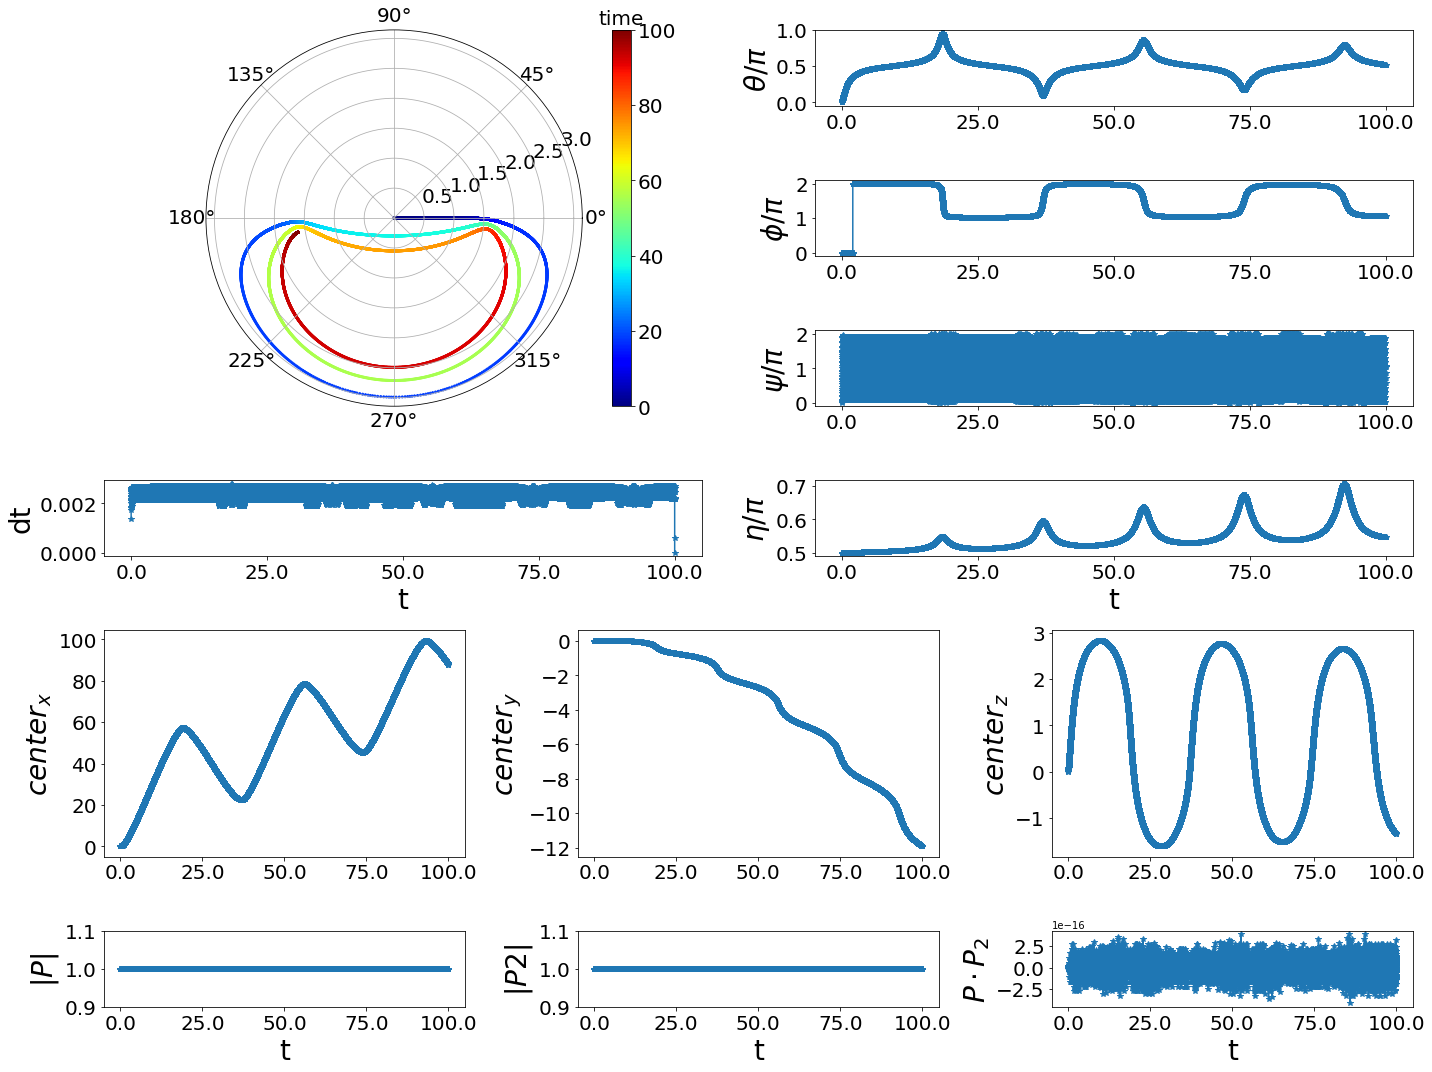

In [6]:
# active ecoli runge kutta 4n method 
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 100
update_fun='RK45'
table_name='planeShearRatex_1d_avr'
rtol=1e-6
atol=1e-9
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_RK4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, table_name=table_name)
t1 = time()
print('table_name: ', table_name)
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_RK4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, %.1fs' % ('RK4n', update_fun, rtol, atol, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
          Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
idx = np.load('../motion_ecoliB01_table/idx.npy')
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
    pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)